## Final Exam WQD 7005 Data Mining 
## Question 1 

### Name: Nurullainy binti Mat Rashid                   
### ID :  17036591

### Topic: Decision Tree Model of Internet Movie Database (IMDb)

The objectives are:

1) To create Decision Tree model using data of TV Show and movie from IMDb. The data was collected from the following website : https://www.imdb.com/search/title/?year=2017

2) Fine tune and further optimise decision tree model

In order to achieve the task, I will be going to cover the following steps:

    1) Importing required libraries
    2) Loading Data
    3) Feature Selection
    4) Splitting Data
    5) Building Decision Tree Model
    6) Evaluating Model
    7) Visualizing Decision Trees


### 1) Importing required libraries

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import export_graphviz  
from sklearn.model_selection import GridSearchCV
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

### 2) Loading Data

In [4]:
# Load dataset

df = pd.read_csv('movies_imdb_preprocessed.csv')
df.head()

,movie_name,year_released,runtime_in_min,genre,revenues,imdb_rating,user_votes,director,actor
0,Gladiator,2000,155,"Action, Adventure, Drama",187705427.0,8.5,1295546,Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen..."
1,Memento,2000,113,"Mystery, Thriller",25544867.0,8.4,1088700,Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ..."
2,Snatch,2000,104,"Comedy, Crime",30328156.0,8.3,760646,Guy Ritchie,"Jason Statham, Brad Pitt, Benicio Del Toro, De..."
3,Requiem for a Dream,2000,102,Drama,3635482.0,8.3,742193,Darren Aronofsky,"Ellen Burstyn, Jared Leto, Jennifer Connelly, ..."
4,X-Men,2000,104,"Action, Adventure, Sci-Fi",157299717.0,7.4,558716,Bryan Singer,"Patrick Stewart, Hugh Jackman, Ian McKellen, F..."


In [5]:
# Remove NAs and unused attribute

df.dropna(how='any', inplace=True)
df = df.drop(['movie_name'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 8 columns):
year_released     816 non-null int64
runtime_in_min    816 non-null int64
genre             816 non-null object
revenues          816 non-null float64
imdb_rating       816 non-null float64
user_votes        816 non-null int64
director          816 non-null object
actor             816 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 57.4+ KB


In [7]:
df.isnull().sum()

year_released     0
runtime_in_min    0
genre             0
revenues          0
imdb_rating       0
user_votes        0
director          0
actor             0
dtype: int64

In [8]:
# Preprocessing revenues column

df_revenue = df['revenues'].div(1000000).to_frame('col') # Change to Million notation
df_revenue.shape

df['revenues'] = df_revenue['col']

df['revenues'] = df['revenues'].round(0).astype(int)
#df.columns = ['revenues in mil']  # Rename the columns name

In [9]:
# Change data to categorical variables

df['year_released'] = df['year_released'].astype('str')
df['genre'] = df['genre'].astype('str')
df['director'] = df['director'].astype('str')
df['actor'] = df['actor'].astype('str')

In [10]:
# one hot encoding all categorical variables
# all numerical variables are automatically excluded
# number of columns after the conversion should explode
print("Before:", len(df.columns))

# one hot encoding
df = pd.get_dummies(df)

print("After:", len(df.columns))

Before: 8
After: 1351


In [11]:
df.head()

,runtime_in_min,revenues,imdb_rating,user_votes,year_released_2000,year_released_2001,year_released_2002,year_released_2003,year_released_2004,year_released_2005,...,"actor_Will Smith, Eva Mendes, Kevin James, Amber Valletta","actor_Will Smith, Jared Leto, Margot Robbie, Viola Davis","actor_Will Smith, Margot Robbie, Rodrigo Santoro, Adrian Martinez","actor_Will Smith, Martin Lawrence, Gabrielle Union, Jordi Mollà","actor_Will Smith, Rosario Dawson, Woody Harrelson, Michael Ealy","actor_Will Smith, Thandie Newton, Jaden Smith, Brian Howe","actor_Will Smith, Tommy Lee Jones, Josh Brolin, Jemaine Clement","actor_Yun-Fat Chow, Michelle Yeoh, Ziyi Zhang, Chen Chang","actor_Zac Efron, Matthew Perry, Leslie Mann, Thomas Lennon","actor_Zach Braff, Peter Sarsgaard, Natalie Portman, Ian Holm"
0,155,188,8.5,1295546,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,113,26,8.4,1088700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,104,30,8.3,760646,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,102,4,8.3,742193,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104,157,7.4,558716,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3) Feature Selection


In [12]:
# Find average revenue number to estimate a threshold

df['revenues'].mean()

122.46446078431373

Based on average revenue, I will set USD 100 million as threshold to binarize the target variable.

In [13]:
# Change revenues column to binary variables

threshold, upper, lower = 100, 1, 0

df['revenues'] = np.where(df['revenues']>threshold, upper, lower)

In [14]:
df['revenues'].unique()

array([1, 0])

In [15]:
df.head()

,runtime_in_min,revenues,imdb_rating,user_votes,year_released_2000,year_released_2001,year_released_2002,year_released_2003,year_released_2004,year_released_2005,...,"actor_Will Smith, Eva Mendes, Kevin James, Amber Valletta","actor_Will Smith, Jared Leto, Margot Robbie, Viola Davis","actor_Will Smith, Margot Robbie, Rodrigo Santoro, Adrian Martinez","actor_Will Smith, Martin Lawrence, Gabrielle Union, Jordi Mollà","actor_Will Smith, Rosario Dawson, Woody Harrelson, Michael Ealy","actor_Will Smith, Thandie Newton, Jaden Smith, Brian Howe","actor_Will Smith, Tommy Lee Jones, Josh Brolin, Jemaine Clement","actor_Yun-Fat Chow, Michelle Yeoh, Ziyi Zhang, Chen Chang","actor_Zac Efron, Matthew Perry, Leslie Mann, Thomas Lennon","actor_Zach Braff, Peter Sarsgaard, Natalie Portman, Ian Holm"
0,155,1,8.5,1295546,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,113,0,8.4,1088700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,104,0,8.3,760646,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,102,0,8.3,742193,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104,1,7.4,558716,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Assigning X and y variables. y variable is revenues in mil while the rest of the variables are X variables

X = df.drop(['revenues'], axis=1)
y = df['revenues']

### 4) Splitting Data

In [17]:
# Setting random state = 0
rs = 0

# Training set = 70%
# Test Set = 30%
# Stratify = Yes
X_mat = np.asmatrix(X)
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

As `train_test_split` shuffles the dataset before splitting it, it is important to set a consistent random state, which is the seed number used to generate the shuffle. I am using 0 for random state number

Convert `X` (`DataFrame` object) into a `numpy` matrix that can be consumed by `sklearn`. Next, use the `train_test_split` function to split dataset into 70% training and 30% test data. This is to ensure there is enough representation of the minority class in the training set. In this case, I need larger training set, which is 70/30.

Stratification method ensures the same ratio of positive and negative targets in both train and test data set.

### 5) Building Decision Tree Model

Initialise a model and training it using `.fit` function.

In [18]:
# Decision tree training

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 6) Evaluating Model

In [19]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 1.0


It seems that the model has managed to learn all of the patterns in training data and is able to predict with 100% accuracy. However, need to check whether it can replicate the performance on similar data that it is not trained on (test data).

In [20]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.7224489795918367


This is a clear indication of overfitting of the model. This model will fail to make accurate predictions with new data because it learned the training data too well. Need to make the model generalize better on training dataset.

I'm using `classification_report()` function to assess the model's prediction on test data. `classification_report()` outputs a number of statistics for each target class:

1. Precision: Proportion of all positive predictions that are correct. Precision is a measure of how many positive predictions were actual positive observations.
2. Recall: Proportion of all real positive observations that are correct. Recall is a measure of how many actual positive observations were predicted correctly.
3. F1: The harmonic mean of precision and recall. F1 score is an 'average' of both precision and recall.
4. Support: Number of instances in each class.


In [21]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       132
           1       0.71      0.66      0.69       113

    accuracy                           0.72       245
   macro avg       0.72      0.72      0.72       245
weighted avg       0.72      0.72      0.72       245



To understand the Decision Tree model built, lets view the feature importance and visualize the tree using `sklearn` module

### 7) Visualizing Decision Trees

#### Feature importance

In [22]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# Print 10 most important features
indices = indices[:10]

for i in indices:
    print(feature_names[i], ':', importances[i])

user_votes : 0.3332438930137847
imdb_rating : 0.13867919796658823
runtime_in_min : 0.062263933922945935
genre_Animation, Adventure, Comedy : 0.03910759750547421
genre_Animation, Action, Adventure : 0.016281580092323313
genre_Action, Adventure, Sci-Fi : 0.013854789878016052
year_released_2013 : 0.011435699581854534
year_released_2008 : 0.011154912315335774
genre_Animation, Comedy, Family : 0.010168940176953993
genre_Biography, Drama, Sport : 0.009974319312323244


We can't really gain insights of the decision tree with feature importance only. Need to perform feature importance and visualization to understand the decision tree model.  Use `export_graphviz` function and `pydot` module and save `.png` file to view the decision tree.

In [23]:
# Visualize the 1st Decision Tree

dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)

graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt1.png")

![GridSearchCV decision tree](dt1.png)

The above tree shows that the model is very complex, incomprehensible, and deep which is a typical characteristic of an overfitting model. I want to limit the complexity of the model by setting the max_depth that the model can go. `max_depth` in a decision tree is a hyperparameter for structuring the depth of the tree (model). 

In [24]:
# Retrain model with a smaller max_depth limit = 9

model = DecisionTreeClassifier(max_depth=9, random_state=rs)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train),"\nTest accuracy:", model.score(X_test, y_test))
print()

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9124343257443083 
Test accuracy: 0.7020408163265306

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       132
           1       0.70      0.61      0.65       113

    accuracy                           0.70       245
   macro avg       0.70      0.70      0.70       245
weighted avg       0.70      0.70      0.70       245



The simpler model (smaller max_depth) resulting the accuracy of the model on training data reduce to 91.2%. This means that model notes there is a trend in the data but not learning the training data too well.

View new feature importance and visualize this new decision tree.

In [25]:
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# Print 10 variable X
indices = indices[:10]

for i in indices:
    print(feature_names[i], ':', importances[i])

user_votes : 0.41490770933880516
imdb_rating : 0.1782355292621014
runtime_in_min : 0.048040040477395594
genre_Animation, Adventure, Comedy : 0.04532596006205183
genre_Animation, Action, Adventure : 0.020253489273309784
genre_Action, Adventure, Sci-Fi : 0.01877402858025954
year_released_2013 : 0.015496023590055514
genre_Biography, Drama, Sport : 0.01377949252164491
genre_Animation, Comedy, Family : 0.013259547045420502
year_released_2017 : 0.01011693808279453


In [26]:
# Visualize the new tree

dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt2.png") # saved in the following file

![GridSearchCV decision tree](dt2.png)

This looks better from the first model. However, the tree has more 20 leaf nodes here. Furthermore, there are a number of samples and value splits in each node. 

Next is to find the optimal combination of parameters for the model.

#### Finding optimal Hyperparameters with GridSearchCV

A common method to find the optimal set of parameters for a model is to run an exhaustive search over all possible values of each parameter. Cross validation typically used to prevent overfitting.

In `k-fold cross-validation`, the training dataset is randomly partitioned into `k` equal size partitions. Every k subsamples, one single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation, which we will use to choose the best model. (courtesy of openml.org)

`Grid-search` builds a model for every combination of hyperparameters specified and evaluates each model. 

In `sklearn`, the grid-search + k-fold validation is implemented in `GridSearchCV`.

Begin with plotting max_depth values vs training and test accuracy score to a give an idea of the optimal max_depth

In [35]:
test_score = []
train_score = []

# check the model performance for max depth from 2-12
for max_depth in range(2, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))

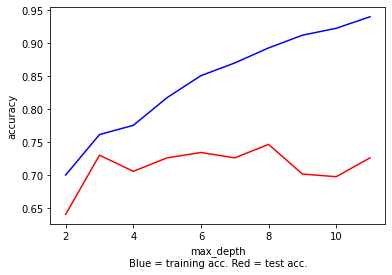

In [36]:
# plot max depth hyperparameter values vs training and test accuracy score

plt.plot(range(2, 12), train_score, 'b', range(2,12), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

To perform a `GridSearchCV`, we first have to determine the hyperparameters and possible values of parameters that we want to use. A model `hyperparameter` is a characteristic of a model that is external to the model and whose value cannot be estimated from data.

For decision tree model, I will search on 3 hyperparameters:

    1. Criterion: The function to measure the quality of a split. There are two criterias we will use, “gini” for the Gini impurity and “entropy” for the information gain.
    2. Max depth: The maximum depth of the tree. Let's start with range of 2-11.
    3. Min samples leaf: The minimum number of samples required to be at a leaf node, allowing us to limit the minimum size of a leaf node. Let's start with range of 20-60 with step of 10.

In [37]:
# GridsearchCV #1 

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 10),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7495621716287215
Test accuracy: 0.7183673469387755
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       132
           1       0.73      0.61      0.67       113

    accuracy                           0.72       245
   macro avg       0.72      0.71      0.71       245
weighted avg       0.72      0.72      0.71       245

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 40}


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



The `accuracy` score for the 3rd model is 72% which improved from the 2nd model, 70%. At the same time, the Precision is increased by 2% from the previous model. I want to fine tune and further optimise on the parameters if possible.

At this moment, the metric Recall (sensitivity) is accpetable at 81% and 61%.

Let's do another grid-search, now being more specific using the result from the 1st grid-search.

In [28]:
# GridsearchCV #2

params = {'criterion': ['gini'],
          'max_depth': range(1, 6),
          'min_samples_leaf': range(40, 60, 5)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7495621716287215
Test accuracy: 0.7183673469387755
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       132
           1       0.73      0.61      0.67       113

    accuracy                           0.72       245
   macro avg       0.72      0.71      0.71       245
weighted avg       0.72      0.72      0.71       245

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 45}


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



The `classification report` of 4th model return not much different from the 3rd model. Both models have same weighted average score for `Accuracy`, `Precision` and `Recall`. In this case, I will retrain a new model based simpler hyperparameter, being only 4 levels deep. 

In [38]:
# Retrain final model with optimal parameter, max_depth limit = 4

model = DecisionTreeClassifier(max_depth=4, random_state=rs)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train),"\nTest accuracy:", model.score(X_test, y_test))
print()

Train accuracy: 0.7758318739054291 
Test accuracy: 0.7061224489795919



In [39]:
# Visualize the optimal tree

dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)

graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("optimal_tree.png") # saved in the following file

![GridSearchCV decision tree](optimal_tree.png)

Note for Leaf node:

    True: The movie will generate USD 100 million and above
    False: The movie will generate less than USD 100 million